<a href="https://colab.research.google.com/github/vitspa/Segmentation_MIA_python/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys, requests, tarfile, io, itertools
if os.getcwd()=='/content':
    try:
        from google.colab import drive
        base_working_dir = '/content/drive/My Drive/MIA_mini_project'
        drive.mount('/content/drive')
    except:
        base_working_dir = os.getcwd()
        pass

sys.path.append(base_working_dir)
os.makedirs(base_working_dir, exist_ok=True)
os.chdir (base_working_dir)
print (base_working_dir)

/content


In [ ]:
image_path = 'Development_Data/Fused_909-57.lsm_909-58..tiftproj.png'
#image_path2 = 'Development_Data/ground_truth.jpg'
image_path3 = 'Development_Data/Fused_909-47.lsm_909-48..tiftproj.png'
image_path4 = 'Development_Data/Fused_909-59.lsm_909-60..tiftproj.png'

In [ ]:
GT = 'Development_Data/Fused_909-57.lsm_909-58_GT.png'
GT2 = 'Development_Data/Fused_909-47.lsm_909-48..tiftproj_MS.png'
GT3 = 'Development_Data/Fused_909-59.lsm_909-60..tiftproj_MS'

## Threshold based segmentation

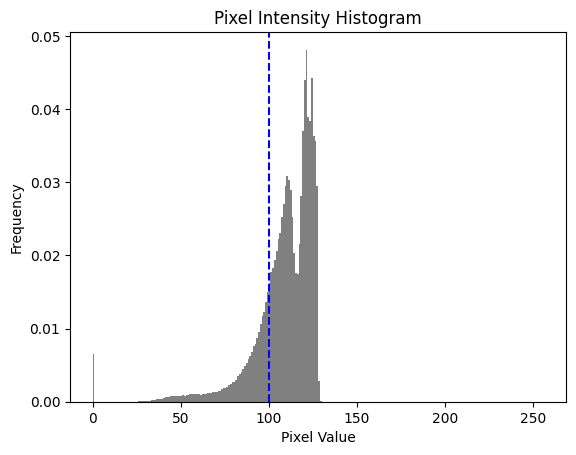

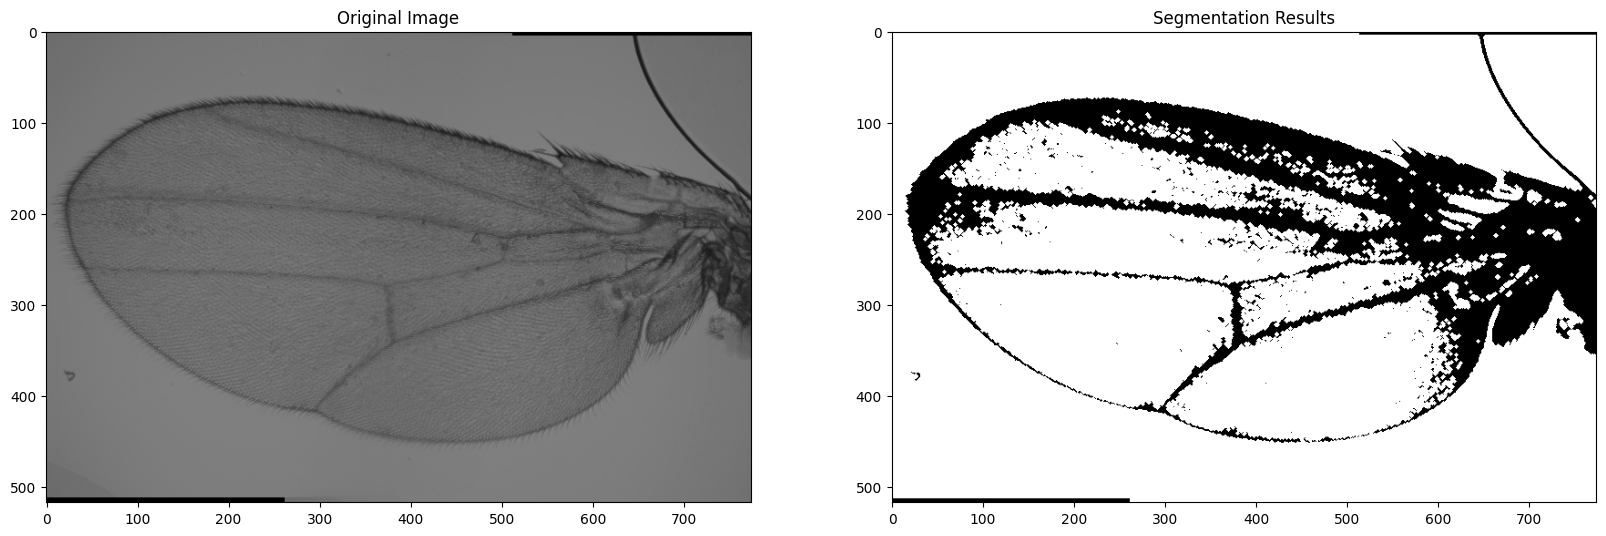

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the 2D image array to a 1D array
pixel_values = image.flatten()

# Plot the histogram
plt.hist(pixel_values, bins=256, range=[0, 256], density=True, color='gray')
plt.axline((100,0),(100,0.01), color='b', linestyle='--')
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Manually set thresholds based on histogram analysis
threshold = 100

# Apply thresholding to segment the image
segmented_image = np.zeros_like(image)
segmented_image[image < threshold] = 0
segmented_image[image > threshold] = 255

# Perform morphological operations to clean up the binary mask
segmented_image = morphology.binary_erosion(segmented_image, morphology.disk(1))
segmented_image = morphology.binary_dilation(segmented_image, morphology.disk(2))

# Display the original image and segmented image
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentation Results')

plt.show()



## Threshold based segmentation

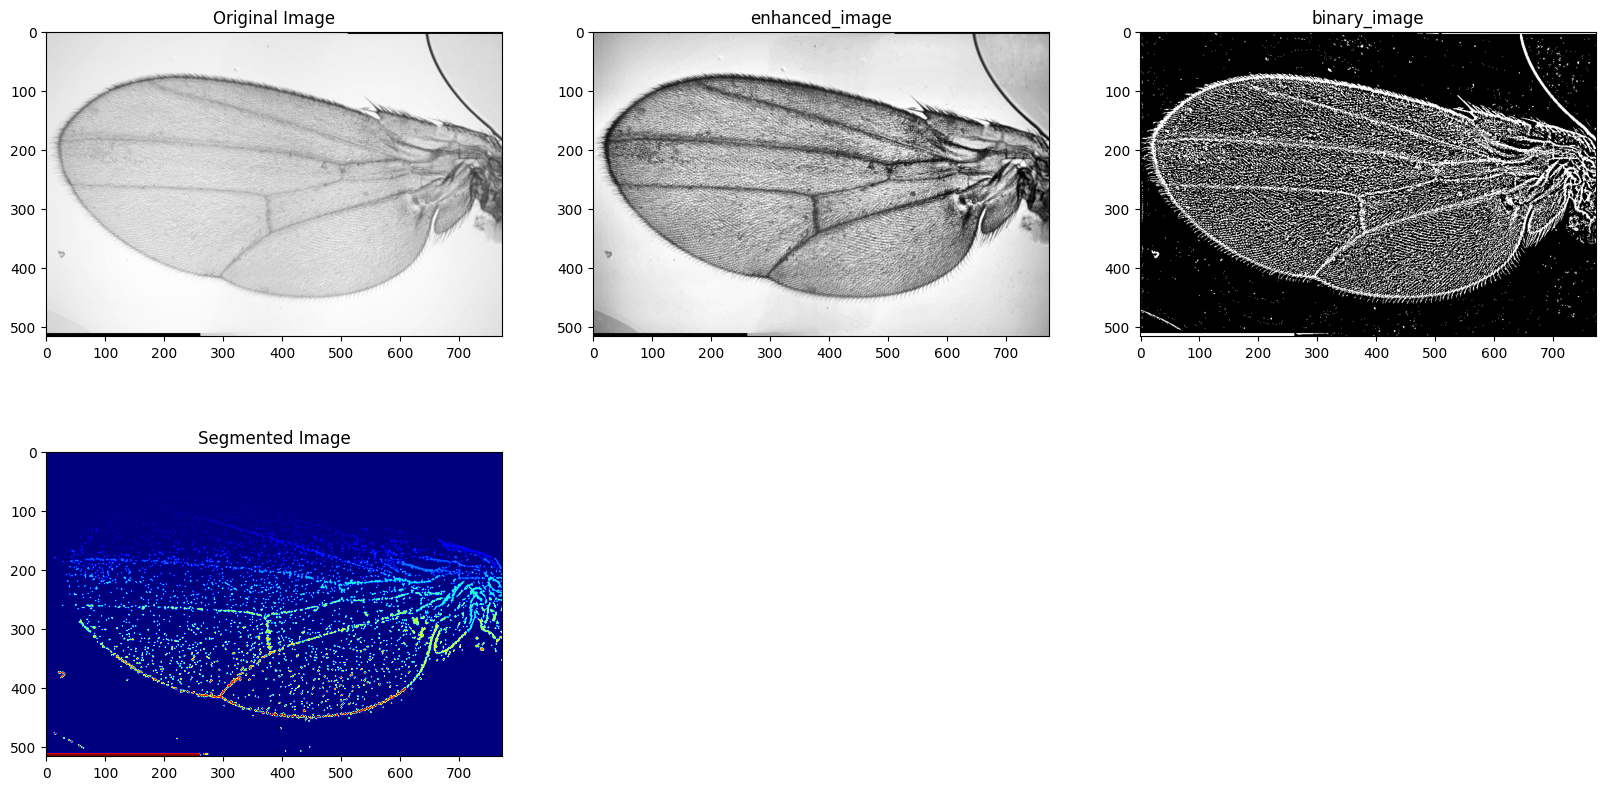

In [ ]:
import numpy as np
from skimage import io, color, exposure, filters, morphology
import matplotlib.pyplot as plt

def enhance_contrast(image):

    # Apply histogram equalization to enhance contrast
    enhanced_image = exposure.equalize_adapthist(image, clip_limit=0.03)

    return enhanced_image

def segment_drosophila_wing(image_path):
    # Load the image
    image = io.imread(image_path)

    # Enhance contrast using histogram equalization
    enhanced_image = enhance_contrast(image)

    # Apply adaptive thresholding to create a binary mask
    binary_image = enhanced_image < filters.threshold_local(enhanced_image, block_size= 17, method='gaussian', offset=0.03)

    binary_mask = binary_image

    # Perform morphological operations to clean up the binary mask
    binary_mask = morphology.binary_erosion(binary_mask, morphology.disk(1))
    binary_mask = morphology.binary_dilation(binary_mask, morphology.disk(1))

    # Label connected components in the binary mask
    labeled_image, num_labels = morphology.label(binary_mask, return_num=True)

    # Display the original image, grayscale image, and segmented image
    plt.figure(figsize=(20,10))

    plt.subplot(231)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(232)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title("enhanced_image")

    plt.subplot(233)
    plt.imshow(binary_image, cmap='gray')
    plt.title("binary_image")

    plt.subplot(234)
    plt.imshow(labeled_image, cmap='jet')  # Use 'jet' colormap for better visualization
    plt.title("Segmented Image")

if __name__ == "__main__":
    # Replace 'your_image_path.jpg' with the actual path to your Drosophila wing image
    image_path = 'Development_Data/Fused_909-57.lsm_909-58..tiftproj.png'
    segment_drosophila_wing(image_path)


## watershed segmentation

<ipython-input-13-6346d6094294>:16: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradient = filters.rank.gradient(gray_image, morphology.disk(20))


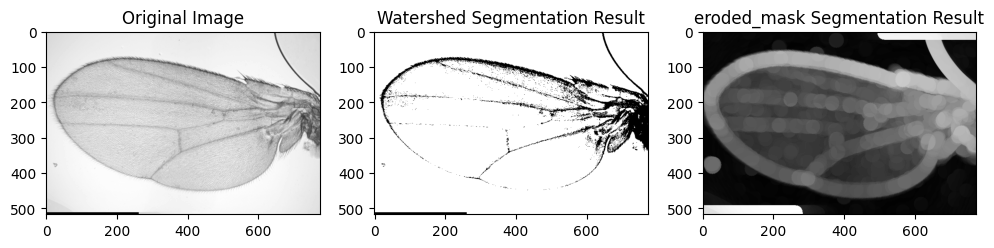

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology, segmentation, color
from scipy import ndimage

# Load your image (replace 'your_image_path.jpg' with the actual path)
original_image = plt.imread(image_path)

# Convert the image to grayscale
gray_image = original_image

# Enhance the contrast or preprocess the image if needed


# Apply gradient-based segmentation to identify markers
gradient = filters.rank.gradient(gray_image, morphology.disk(20))
markers = np.zeros_like(gray_image)
markers[gray_image < filters.threshold_li(gray_image)] = 1
markers[gray_image > filters.threshold_li(gray_image)] = 2

# Apply watershed segmentation
ws_labels = segmentation.watershed(gradient, markers)

# Post-process the segmentation results (optional)


# Display the original image and segmented result
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(ws_labels, cmap='gray')
axes[1].set_title('Watershed Segmentation Result')

axes[2].imshow(gradient, cmap='gray')
axes[2].set_title('eroded_mask Segmentation Result')

plt.show()


## Watershed with markers

[]


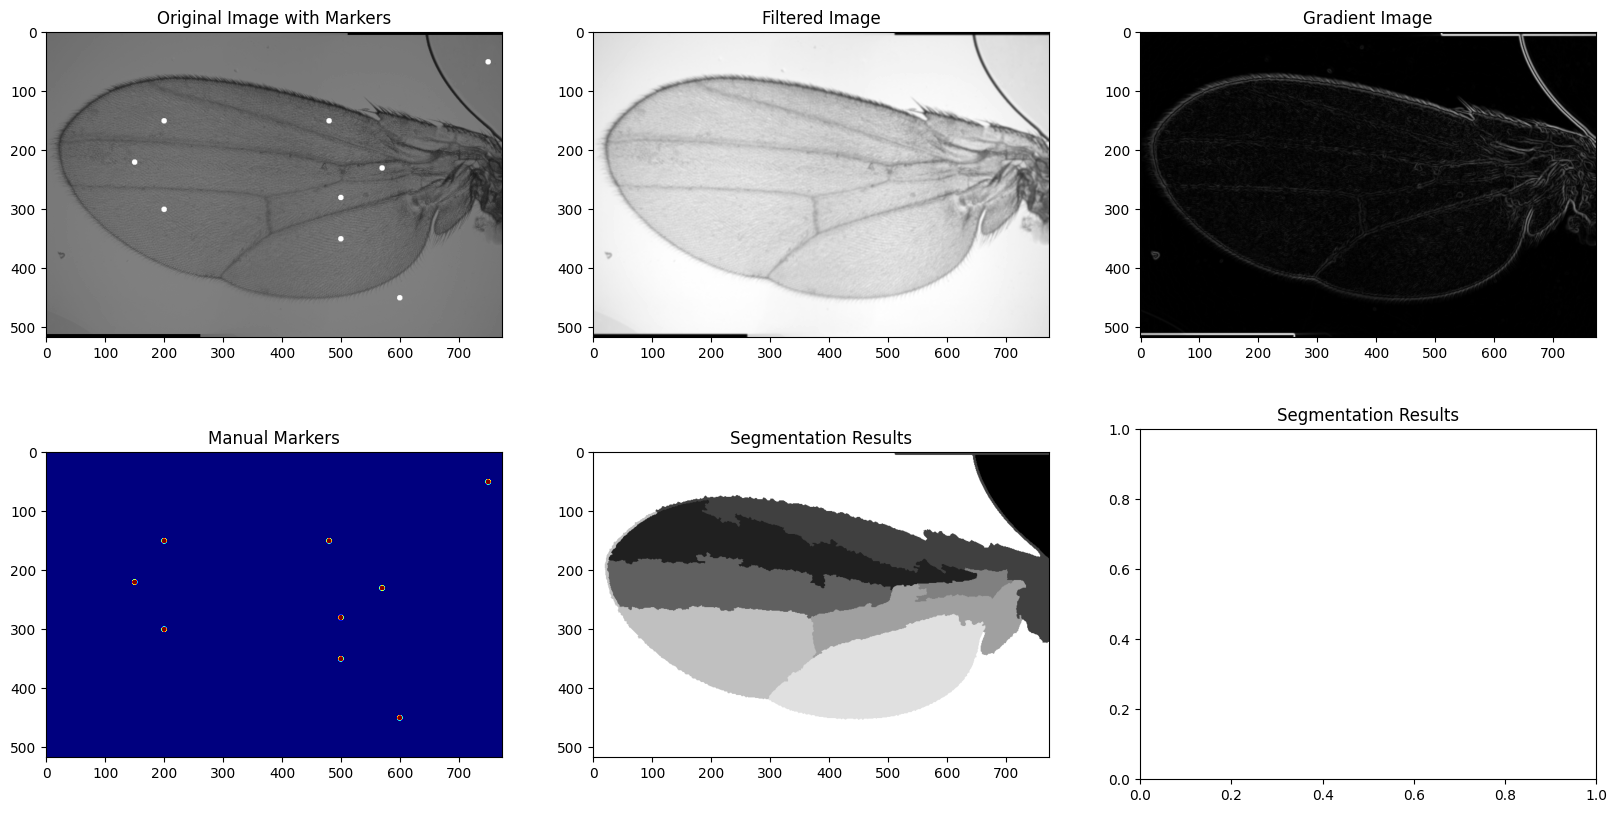

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology, segmentation,measure
from skimage.measure import label
from skimage.feature import canny
from skimage.draw import disk

# Read the image
image = io.imread('Development_Data/Fused_909-57.lsm_909-58..tiftproj.png')

# Apply filters and gradients
# Experiment with different filters and gradients based on your image characteristics
filtered_image = filters.gaussian(image, sigma=1)
gradient_image = filters.sobel(filtered_image)

# Create manual markers
marker_coordinates = [(150, 200), (150, 480), (300, 200),(220, 150),(350, 500),(280, 500),(450, 600),(230,570),(50,750)]
radius = 5

markers = np.zeros_like(image)
for coord in marker_coordinates:
    rr, cc = disk(coord, radius=radius, shape=image.shape)
    markers[rr, cc] = 1

# Overlay markers on the original image
image_with_markers = image.copy()
image_with_markers[markers == 1] = [255]


# Apply watershed algorithm with manual markers
segmentation_result = segmentation.watershed(gradient_image, label(markers))

# Find contours of segmented regions
contours = measure.find_contours(image, 0.5)

# Display the original image with overlaid markers
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.imshow(image_with_markers,cmap='gray')
plt.title('Original Image with Markers')

plt.subplot(232)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.subplot(233)
plt.imshow(gradient_image, cmap='gray')
plt.title('Gradient Image')

plt.subplot(234)
plt.imshow(markers, cmap='jet')
plt.title('Manual Markers')

plt.subplot(235)
plt.imshow(segmentation_result, cmap='gray')
plt.title('Segmentation Results')

plt.subplot(236)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='white')
plt.title('Segmentation Results')

plt.show()


In [ ]:
image_path = 'Development_Data/Fused_909-57.lsm_909-58..tiftproj.png'
image = io.imread(image_path)

## Contrast enchancement algorithm

Text(0.5, 1.0, 'result_image')

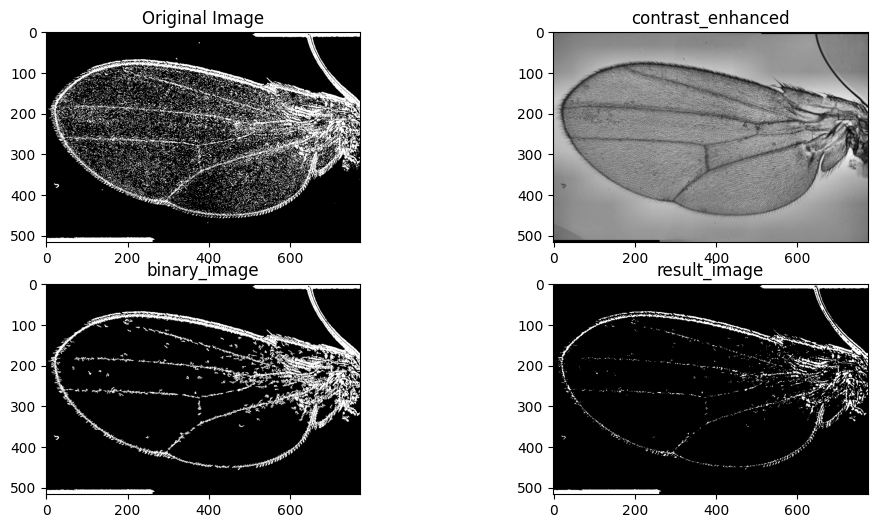

In [ ]:
import cv2
import numpy as np
from skimage import exposure, morphology, measure,transform,filters
import matplotlib.pyplot as plt
from matplotlib import cm

# Step a: Load the image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step c: Contrast enhancement with CLAHE
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))
contrast_enhanced = clahe.apply(original_image)

# Step d: Background exclusion
average_filtered = cv2.blur(contrast_enhanced, (15,20))
background_excluded = cv2.absdiff(contrast_enhanced, average_filtered)

# Step e: Binarization
_, binary_image = cv2.threshold(background_excluded, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step f: Remove smaller components
binary_image_cleaned = morphology.remove_small_objects(binary_image.astype(bool), min_size=20, connectivity=1)

CLAHE_segmented = binary_image_cleaned.astype(np.uint8) * 255

# Step g: Network of veins
result_image = morphology.erosion(binary_image_cleaned, morphology.square(2))
CLAHE_segmented_v2 = result_image

plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(contrast_enhanced,cmap='gray')
plt.title('contrast_enhanced')

plt.subplot(2, 2, 3)
plt.imshow(binary_image_cleaned.astype(np.uint8) * 255,cmap='gray')
plt.title('binary_image')

plt.subplot(2, 2, 4)
plt.imshow(result_image,cmap='gray')
plt.title('result_image')

## skeletonization

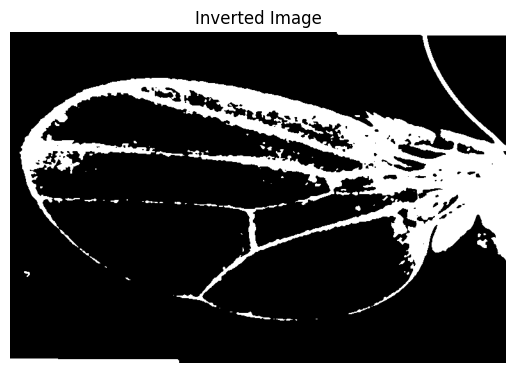

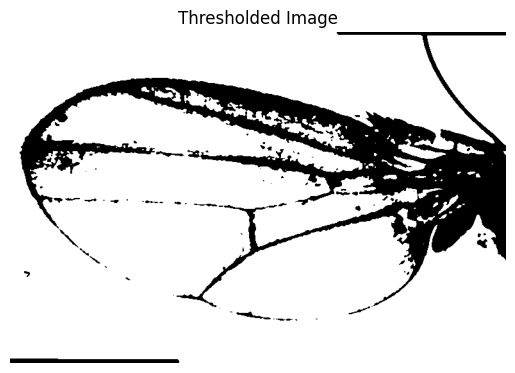

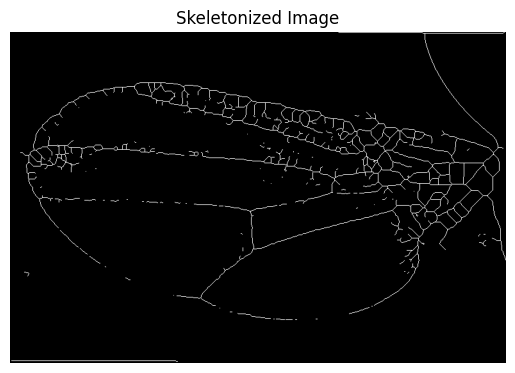

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def skeletonize_segmentation(image_path):
    # Read the image
    image = io.imread(image_path)
    gray = image

    # Invert the image if the background is brighter than the wings


    # Apply GaussianBlur to reduce noise
    blurred = filters.gaussian(gray, sigma=1.5)

    # Threshold the image
    thresholded_image = blurred > filters.threshold_otsu(blurred)

    inverted_image = 1 - thresholded_image
    # Skeletonize the binary image
    skeleton = morphology.skeletonize(inverted_image)

    # Display the results
    display_image(inverted_image, 'Inverted Image')
    display_image(thresholded_image, 'Thresholded Image')
    display_image(skeleton, 'Skeletonized Image')

    return skeleton

# Specify the path to your image
#image_path = GT

# Perform skeletonization and display results
skeleton = skeletonize_segmentation(image_path)


## Ridge Operators

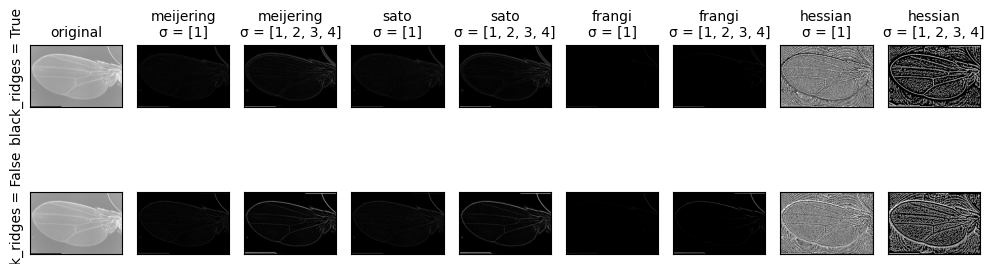

In [ ]:
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt


def original(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image


image = io.imread(image_path)
image = 1- image
cmap = plt.cm.gray

plt.rcParams["axes.titlesize"] = "medium"
axes = plt.figure(figsize=(10, 4)).subplots(2, 9)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate([
            (original, None),
            (meijering, [1]),
            (meijering, range(1, 5)),
            (sato, [1]),
            (sato, range(1, 5)),
            (frangi, [1]),
            (frangi, range(1, 5)),
            (hessian, [1]),
            (hessian, range(1, 5)),
    ]):
        result = func(image, black_ridges=black_ridges, sigmas=sigmas)
        axes[i, j].imshow(result, cmap=cmap)
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

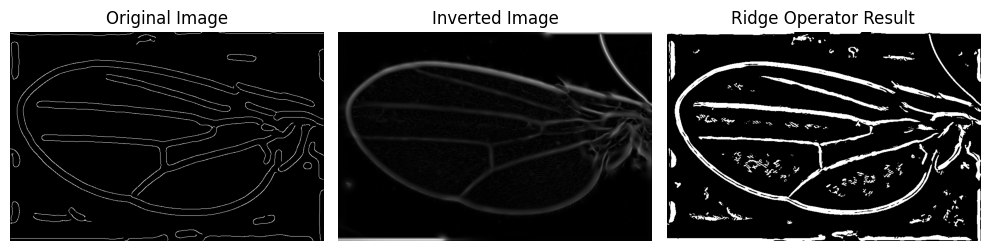

In [ ]:
from skimage import io, color, filters
import matplotlib.pyplot as plt
from skimage import exposure,morphology,feature


# Read the image (replace 'path/to/your/image.jpg' with the actual path)
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = image

enhanced_image = filters.sato(gray_image)
# Invert the image to highlight darker structures
inverted_image = enhanced_image

# Apply the Ridge Operator
ridge_result = filters.hessian(inverted_image,sigmas=range(1, 12, 2))
#ridge_result = (ridge_result, morphology.square(4))
edge = feature.canny(ridge_result, sigma=7)


# Display the original image, inverted image, and Ridge Operator result
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(edge, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(inverted_image, cmap='gray')
plt.title('Inverted Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(ridge_result, cmap='gray')  # Adjust the colormap as needed
plt.title('Ridge Operator Result')
plt.axis('off')

plt.tight_layout()
plt.show()


## Sato filters

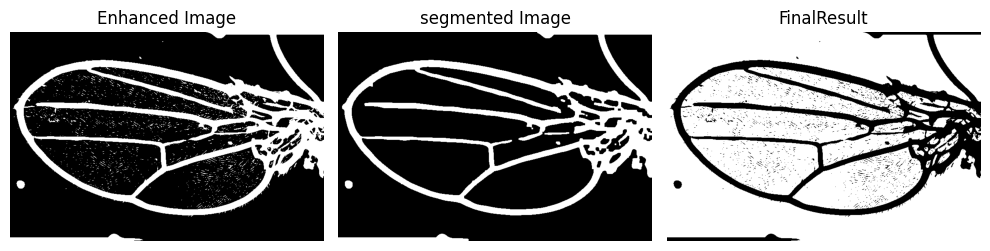

In [ ]:
from skimage import io, color, filters
import matplotlib.pyplot as plt
from skimage import exposure,morphology,feature
import numpy as np

# Read the image (replace 'path/to/your/image.jpg' with the actual path)
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = image

enhanced_image = filters.sato(gray_image)



# Set a threshold (adjust as needed)
threshold_value = 0.01

# Create a binary mask based on the threshold
binary_mask = enhanced_image < threshold_value

# Invert the pixels not meeting the threshold
inverted_image = np.ones_like(enhanced_image)
inverted_image[binary_mask] = 0

edge = morphology.opening(inverted_image, morphology.square(4))
edge = morphology.closing(edge, morphology.square(5))
#edge = morphology.opening(edge, morphology.square(5))


# edge = morphology.erosion(inverted_image, morphology.square(5))
# edge = morphology.dilation(edge, morphology.square(6))

# Invert the colors
final_image = 255 - edge
sato_segmented_1 = edge

# Display the original image, inverted image, and Ridge Operator result
plt.figure(figsize=(10, 4))

plt.subplot(132)
plt.imshow(edge, cmap='gray')
plt.title('segmented Image')
plt.axis('off')

plt.subplot(131)
plt.imshow(inverted_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(binary_mask, cmap='gray')  # Adjust the colormap as needed
plt.title('FinalResult')
plt.axis('off')

plt.tight_layout()
plt.show()



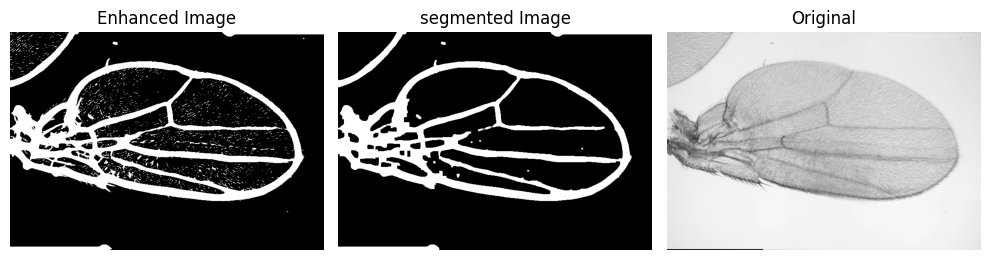

In [ ]:
from skimage import io, color, filters
import matplotlib.pyplot as plt
from skimage import exposure,morphology,feature
import numpy as np

# Read the image (replace 'path/to/your/image.jpg' with the actual path)
image = io.imread(image_path3)

# Convert the image to grayscale
gray_image = image

enhanced_image = filters.sato(gray_image)



# Set a threshold (adjust as needed)
threshold_value = 0.01

# Create a binary mask based on the threshold
binary_mask = enhanced_image < threshold_value

# Invert the pixels not meeting the threshold
inverted_image = np.ones_like(enhanced_image)
inverted_image[binary_mask] = 0

edge = morphology.opening(inverted_image, morphology.square(4))
edge = morphology.closing(edge, morphology.square(7))
#edge = morphology.opening(edge, morphology.square(5))


# edge = morphology.erosion(inverted_image, morphology.square(5))
# edge = morphology.dilation(edge, morphology.square(6))

# Invert the colors
final_image = 255 - edge
sato_segmented_2 = edge

# Display the original image, inverted image, and Ridge Operator result
plt.figure(figsize=(10, 4))

plt.subplot(132)
plt.imshow(edge, cmap='gray')
plt.title('segmented Image')
plt.axis('off')

plt.subplot(131)
plt.imshow(inverted_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(image, cmap='gray')  # Adjust the colormap as needed
plt.title('Original')
plt.axis('off')

plt.tight_layout()
plt.show()


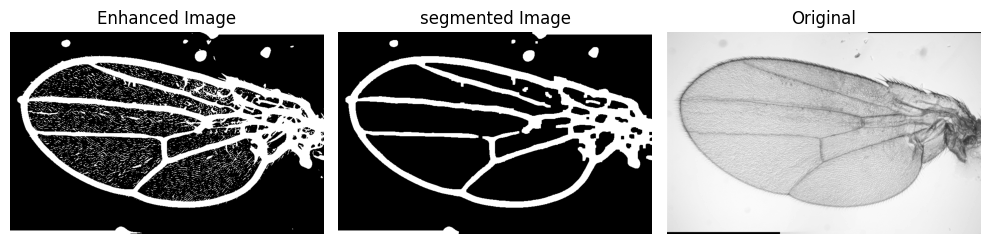

In [ ]:
from skimage import io, color, filters
import matplotlib.pyplot as plt
from skimage import exposure,morphology,feature
import numpy as np

# Read the image (replace 'path/to/your/image.jpg' with the actual path)
image = io.imread(image_path4)

# Convert the image to grayscale
gray_image = image

enhanced_image = filters.sato(gray_image)



# Set a threshold (adjust as needed)
threshold_value = 0.01

# Create a binary mask based on the threshold
binary_mask = enhanced_image < threshold_value

# Invert the pixels not meeting the threshold
inverted_image = np.ones_like(enhanced_image)
inverted_image[binary_mask] = 0

edge = morphology.opening(inverted_image, morphology.square(6))
edge = morphology.closing(edge, morphology.square(6))
#edge = morphology.opening(edge, morphology.square(5))


# edge = morphology.erosion(inverted_image, morphology.square(5))
# edge = morphology.dilation(edge, morphology.square(6))

# Invert the colors
final_image = 255 - edge
sato_segmented_3 = edge

# Display the original image, inverted image, and Ridge Operator result
plt.figure(figsize=(10, 4))

plt.subplot(132)
plt.imshow(edge, cmap='gray')
plt.title('segmented Image')
plt.axis('off')

plt.subplot(131)
plt.imshow(inverted_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(image, cmap='gray')  # Adjust the colormap as needed
plt.title('Original')
plt.axis('off')

plt.tight_layout()
plt.show()


## Quantitative analysis

Ground truth extraction

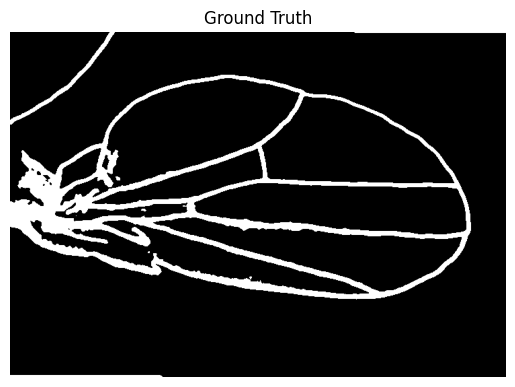

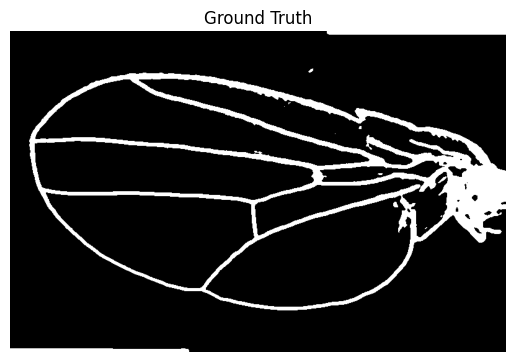

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology
from PIL import Image
import cv2

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def GT_segmentation(image_path):
    # Read the image
    image = io.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = filters.gaussian(image, sigma=1.5)
    # Threshold the image
    thresholded_image = blurred > filters.threshold_otsu(blurred)

    ground_truth = 1 - thresholded_image
    #ground_truth = morphology.dilation(ground_truth,morphology.disk(3))
    # Display the results
    display_image(ground_truth, 'Ground Truth')
    #display_image(thresholded_image, 'Thresholded Image')

    return ground_truth

# Perform skeletonization and display results
#ground_truth_1 =GT_segmentation(GT)
ground_truth_2 =GT_segmentation(GT2)
ground_truth_3 =GT_segmentation(GT3)

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


binary_mask_gt  = ground_truth
segmented_masks =[sato_segmented_1,CLAHE_segmented_v2]

for i, segmented_mask in enumerate(segmented_masks):
    # Intersection over Union (IoU)
    intersection = np.logical_and(binary_mask_gt, segmented_mask)
    union = np.logical_or(binary_mask_gt, segmented_mask)
    iou = np.sum(intersection) / np.sum(union)

    print(f"Segmented Result {i + 1} - IoU: {iou}")

    # You can include other metrics if needed, e.g., Dice Coefficient
    dice = (2 * np.sum(intersection)) / (np.sum(binary_mask_gt) + np.sum(segmented_mask))
    print(f"Segmented Result {i + 1} - Dice Coefficient: {dice}")

    precision = precision_score(binary_mask_gt.flatten(), segmented_mask.flatten())
    recall = recall_score(binary_mask_gt.flatten(), segmented_mask.flatten())
    f1 = f1_score(binary_mask_gt.flatten(),segmented_mask.flatten())
    roc_auc = roc_auc_score(binary_mask_gt.flatten(), segmented_mask.flatten())

    print(f'Segmented Result {i + 1} - Precision: {precision}')
    print(f'Segmented Result {i + 1} - Recall: {recall}')
    print(f'Segmented Result {i + 1} - F1-score: {f1}')
    print(f'Segmented Result {i + 1} - ROC-AUC: {roc_auc}')
    print()  # Add a newline for better readability


# # Create a color map with transparency for overlay
# cmap_overlay = plt.cm.get_cmap('viridis', len(segmented_masks) + 1)
# cmap_colors = cmap_overlay(np.arange(len(segmented_masks) + 1))

# # Display the ground truth
# plt.subplot(1, 1, 1)
# plt.title('Overlay: Ground Truth and Segmented Results')

# # Plot the ground truth in blue
# plt.imshow(binary_mask_gt, cmap='gray', alpha=0.5)

# # Overlay each segmented result with a different color
# for i, segmented_mask in enumerate(segmented_masks):
#     plt.imshow(segmented_mask, cmap='Reds', alpha=0.5, vmin=0, vmax=1)

# plt.axis('off')
# plt.show()



Segmented Result 1 - IoU: 0.6664757090704858
Segmented Result 1 - Dice Coefficient: 0.7998624947761496
Segmented Result 1 - Precision: 0.7801943483806493
Segmented Result 1 - Recall: 0.820547926260908
Segmented Result 1 - F1-score: 0.7998624947761496
Segmented Result 1 - ROC-AUC: 0.8847805195024424

Segmented Result 2 - IoU: 0.24738248341280697
Segmented Result 2 - Dice Coefficient: 0.39664254821981265
Segmented Result 2 - Precision: 0.7659212349099545
Segmented Result 2 - Recall: 0.2676153729134686
Segmented Result 2 - F1-score: 0.3966425482198127
Segmented Result 2 - ROC-AUC: 0.6247882903322991



 **Robustness**

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

binary_mask_gt  = [ground_truth_1, ground_truth_2, ground_truth_3]
segmented_masks = [sato_segmented_1, sato_segmented_2, sato_segmented_3]

for i, (gt_mask, segmented_mask) in enumerate(zip(binary_mask_gt, segmented_masks)):
    # Intersection over Union (IoU)
    intersection = np.logical_and(gt_mask, segmented_mask)
    union = np.logical_or(gt_mask, segmented_mask)
    iou = np.sum(intersection) / np.sum(union)

    print(f"Segmented Result {i + 1} - IoU: {iou}")

    # You can include other metrics if needed, e.g., Dice Coefficient
    dice = (2 * np.sum(intersection)) / (np.sum(gt_mask) + np.sum(segmented_mask))
    print(f"Segmented Result {i + 1} - Dice Coefficient: {dice}")

    precision = precision_score(gt_mask.flatten(), segmented_mask.flatten())
    recall = recall_score(gt_mask.flatten(), segmented_mask.flatten())
    f1 = f1_score(gt_mask.flatten(), segmented_mask.flatten())
    roc_auc = roc_auc_score(gt_mask.flatten(), segmented_mask.flatten())

    print(f'Segmented Result {i + 1} - Precision: {precision}')
    print(f'Segmented Result {i + 1} - Recall: {recall}')
    print(f'Segmented Result {i + 1} - F1-score: {f1}')
    print(f'Segmented Result {i + 1} - ROC-AUC: {roc_auc}')
    print()  # Add a newline for better readability


Segmented Result 1 - IoU: 0.6664757090704858
Segmented Result 1 - Dice Coefficient: 0.7998624947761496
Segmented Result 1 - Precision: 0.7801943483806493
Segmented Result 1 - Recall: 0.820547926260908
Segmented Result 1 - F1-score: 0.7998624947761496
Segmented Result 1 - ROC-AUC: 0.8847805195024424

Segmented Result 2 - IoU: 0.5129656233221598
Segmented Result 2 - Dice Coefficient: 0.6780928996863701
Segmented Result 2 - Precision: 0.5429190152201625
Segmented Result 2 - Recall: 0.9028912954638333
Segmented Result 2 - F1-score: 0.6780928996863701
Segmented Result 2 - ROC-AUC: 0.9077026293298942

Segmented Result 3 - IoU: 0.50915952223932
Segmented Result 3 - Dice Coefficient: 0.6747590493068875
Segmented Result 3 - Precision: 0.5292885435709933
Segmented Result 3 - Recall: 0.930498828255775
Segmented Result 3 - F1-score: 0.6747590493068873
Segmented Result 3 - ROC-AUC: 0.9149816501939947

